## Experiment with Tom Mitchell's image data set

This data set is available at <https://www.cs.cmu.edu/afs/cs.cmu.edu/user/mitchell/ftp/faces.html>.

In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
from mynn import *

In [2]:
# Value that output nodes are expected to have when activated or otherwise
# assuming 1-of-n output encoding
node_off = 0.1
node_on = 0.9

In [3]:
# Number of pixels in each image
n_pixels = 30 * 32

# Obtain list of image files
img_path = Path('../data')
img_files = list(img_path.glob('**/*.pgm'))
n_imgs = len(img_files)

# Determine image categories based on their respective filenames
img_classes = np.array([img_file.stem.split('_')[1:-1] for img_file in img_files])

print(f"Looking   : {np.unique(img_classes[:, 0])}")
print(f"Emotions  : {np.unique(img_classes[:, 1])}")
print(f"Sunglasses: {np.unique(img_classes[:, 2])}")

looking_classes, looking_map = categ2oneofn(img_classes[:, 0], node_off, node_on)
emotion_classes, emotion_map = categ2oneofn(img_classes[:, 1], node_off, node_on)
sunglas_classes, sunglas_map = categ2oneofn(img_classes[:, 2], node_off, node_on)

# Load the images into a numpy array
img_data = np.zeros((n_imgs, n_pixels))

for i in range(len(img_files)):
    with Image.open(img_files[i]) as img:
        img_data[i, :] = list(img.getdata())

# Normalize image data between 0 and 1
img_data /= 255

Looking   : ['left' 'right' 'straight' 'up']
Emotions  : ['angry' 'happy' 'neutral' 'sad']
Sunglasses: ['open' 'sunglasses']


### Train for detecting looking direction

Image data:  (624, 960)
Class data:  (624, 4)


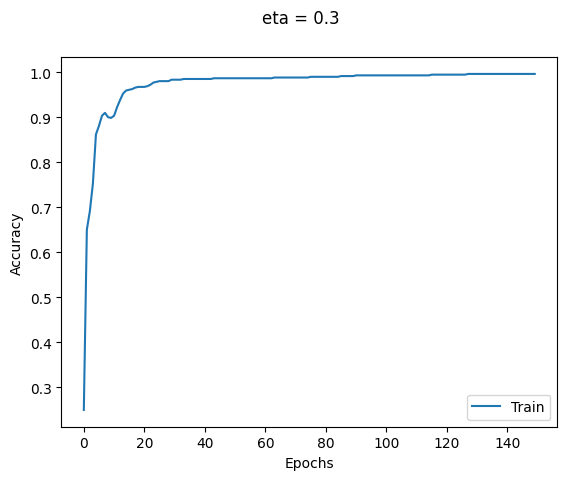

In [4]:
# Backpropagation parameters
epochs = 150
eta = 0.3
mom = 0.3
topol = [n_pixels, 3, 4] # Looking == 4 directions

print("Image data: ", img_data.shape)
print("Class data: ", looking_classes.shape)

# Prepare hooks for registering accuracy
fitreg_img_train = AccuracyRegister(
    img_data, looking_classes, epochs, node_off, node_on
)

# Perform backpropagation
img_classifier = vbackpropagation(
    img_data,
    looking_classes,
    topol,
    epochs,
    eta,
    hooks=[fitreg_img_train],
)

# Plot accuracy
plot_accuracy(
    epochs,
    {
        "Train": fitreg_img_train.accuracies,
    },
    f"eta = {eta}",
)

In [5]:
# Check that it classifies images correctly
rng = np.random.default_rng(234)

rand_img_idxs = rng.integers(n_imgs, size=5)

for img_idx in rand_img_idxs:
    with Image.open(img_files[img_idx]) as img:
        result = vinfer(list(img.getdata()), img_classifier)[-1]
        print(oneofn2categ(result, looking_map, node_off, node_on))
        display(img)

right


right


up


straight


up
